El siguiente desafío busca introducir el problema fundamental de la Ciencia de Datos que es el
overfitting desde un ángulo distinto, presentando los fenómenos del efecto del tamaño de la
muestra, el conocido problema de las múltiples comparaciones y “la maldición del ganador”.

# Definición del problema

## 0) Caso fallido: "una jugadora se quiere pasar de lista"

Una es super talentosa se llama Diana Taurasi, nosotros sabemos que tiene un “índice de enceste”
del 0.85, es decir cada vez que hace un tiro libre su probabilidad de encestar es del 85%. Si hace
100 tiros libres, en promedio encesta 85 veces, a veces puede ser más, a veces menos, pero en
promedio encesta 85 de 100.

La otra es un auténtico desastre, a quien llamaremos Miss X, y su índice de enceste es de 0.10.
Esto quiere decir que si hace 100 tiros libres, en promedio encesta 10.
La cazatalentos NO tiene forma de conocer los valores de 0.85 y 0.10, solo puede hacerlas tirar y
contar aciertos.

La cazatalentos llega al gimnasio, y solo se encuentra Diana, con lo cual le indica que comience a
tirar. Al tiro 10, Diana lleva 8 encestes y dos no-enceste.


En ese momento, llega con un andar cansino Miss X y las interrumpe : ¿cuánto va Diana ? La
cazatalentos le responde 8 de 10. Miss X solicita permiso para tirar, y acierta ese tiro.
Ahí mismo dice : “paren las rotativas, yo soy la clara ganadora de este torneo, mi índice de acierto
es del 100% y el de Diana es del 80% , la matemática es clara”.

La cazatalentos monta en cólera y le dice : pues usted joven solo ha realizado un tiro, ¿Si lo
hubiera errado, aceptaría decir entonces que su índice de acierto es del 0%? Ciertamente no.
Pues ahora, usted deberá seguir tirando hasta completar sus 10 tiros libres, y recién ahí
compararé.

## 1) Primer caso, sin overfitting

La cazatalentos tiene el siguiente algoritmo, hace que Diana Taurasi y Miss X hagan 10 tiros libres
cada una, y elige a la ganadora de esos 10 tiros libres.

¿Garantiza este método que por lo menos el 99% de las veces elige a Diana Taurasi?
¿La desastrosa Miss X puede llegar a encestar los 10 tiros libres? Efectivamente sí existe esa
posibilidad, pero con una muy baja probabilidad, la probabilidad es de 0.10 ^10 = 1e-10

El símbolo de ^ significa "elevado a la potencia de"
¿Cual es la probabilidad que Miss X tire una sola vez y acierte este tiro? Simplemente 0.1 , una en
diez, con lo cual ha tenido mucha suerte en su primer tiro, pero no la va a poder mantener !

¿La adolescente Diana Taurasi puede llegar a encestar los 10 tiros libres? Efectivamente, su
probabilidad es 0.85 ^10 = 0.1968744

En el lenguaje Python la instrucción random.random(10) genera un vector con 10 números
aleatorios con distribución uniforme en el intervalo [0,1], por ejemplo

In [1]:
import numpy as np
np.random.random(10)

array([0.26950279, 0.15320624, 0.7695055 , 0.33183013, 0.51932396,
       0.0030203 , 0.6332249 , 0.35497789, 0.03610054, 0.4688969 ])

La instrucción sum( np.random.random(10) < 0.85 ) calcula cuántos de los 10 valores son
menores a 0.85, es decir, cuantos encestes hizo Michael Jordan en esos 10 tiros libres.
Ahora simulamos 10000 veces la estrategia de tirar 10 tiros libres y quedarse con el ganador.

Ahora simulamos 10000 veces la estrategia de tirar 10 tiros libres y quedarse con el ganador.

In [7]:
missX_ganadora = 0

for i in range(10000):
    aciertos_diana = sum(np.random.random(10) < 0.85)
    aciertos_missX = sum(np.random.random(10) < 0.10)
    if (aciertos_missX > aciertos_diana) :
        missX_ganadora = missX_ganadora + 1

print(missX_ganadora)

0


Lo que da la cantidad de 0, o sea que en 10000 veces, siempre ganó Diana Taurasi, con lo cual la
estrategia de quedarse con el mejor de 10 tiros ha funcionado, para este obvio caso donde hay
apenas dos jugadoras y hay una diferencia abismal entre ellas.

En este caso NO aparece el overfitting por ningún lado

## 2) Segundo Caso, aparece el overfitting

La cazatalentos llega ahora a un pueblo donde hay 100 jugadoras las que son mucho más parejas
entre sí desde el punto de vista del ratio de enceste.

Hay una jugadora, que llamaremos jugadora 1 que tiene un “índice de enceste” de 0.70
Las 99 jugadoras restantes que llamaremos “el pelotón” tienen los índices de enceste { 0.501,
0.0502, 0.503, …, 0.599 }
Es decir la jugadora 1 tiene 0.70 y la mejor jugadora del pelotón tiene 0.599, hay un poco más de
0.10 de diferencia. La diferencia de 0.10 es significativa en basket.

¿Qué sucede con el algoritmo de la cazatalentos de hacer tirar 10 tiros libres a cada una de las
jugadoras y elegir la que más encestes logró ?

In [8]:
#Pongo mi primer semilla
np.random.seed(279511)

# calcula cuantos encestes logra un jugadora con indice de enceste prob
# haciendo qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino los jugadoras
mejor = 0.7
peloton = np.array(range(501, 600)) / 1000
jugadoras = np.append(mejor, peloton)

# veo que tiene el vector
jugadoras

# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

# hago que las 100 jugadoras tiren 10 veces cada una
vec_ftirar(jugadoras, 10)

primera_ganadora = 0

for i in range(10000): # diez mil experimentos
  vaciertos = vec_ftirar(jugadoras, 10) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  if mejor_ronda == 0:
    primera_ganadora += 1




print(primera_ganadora)

1283


Aquí ya pasa algo asombroso, el overfitting en todo su esplendor.

Si hago tirar 10 tiros libres a cada una de las 100 jugadoras, apenas 1450 veces de las 10000 este
método devuelve a la verdadera mejor, que es la jugadora con un índice de enceste de 0.70

Intuitivamente, lo que está sucediendo es que la inmensa mayoría de las veces, una de las 99
jugadoras del pelotón tiene mucha suerte y supera a la jugadora de 0.70, con lo cual se elige a una
del pelotón y no a la verdadera mejor ! El tener 99 jugadoras en el pelotón hace que al ser tantas
hay varias que tienen mala suerte, pero también hay varias con muy buena suerte, y la que tuvo
más suerte supera a la verdadera mejor !

## 3) Tercer caso, nueva ronda: "Maldición del ganador"

Tenemos a nuestra jugadora de 0.70, y a las 99 jugadoras del pelotón. Las hacemos tirar a cada una
10 tiros libres, elegimos a la ganadora registrando cuántos aciertos tuvo, y solo a esa ganadora la
hacemos tirar una nueva ronda de 10 tiros libres, finalmente comparamos estos nuevos aciertos
con los originales.

In [9]:
# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino las jugadoras
mejor = 0.7
peloton = np.array(range(501, 600)) / 1000
jugadoras = np.append(mejor, peloton)

# veo que tiene el vector
jugadoras

# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

for i in range(10):
  vaciertos = vec_ftirar(jugadoras, 10) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  aciertos_torneo = vaciertos[mejor_ronda]
  aciertos_segunda = vec_ftirar(jugadoras[mejor_ronda], 10)
  print(aciertos_torneo, "\t", aciertos_segunda)

9 	 7
10 	 7
9 	 8
9 	 4
10 	 6
10 	 7
9 	 6
9 	 6
10 	 7
9 	 6


(Imagen ilustrativa)
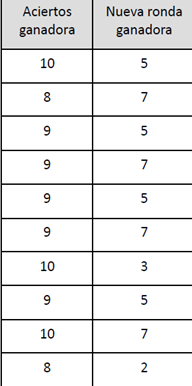

Lo que se observa en este caso es “La maldición del ganador”, la
performance que la jugadora que logró más aciertos en la
competencia general luego NO LA PUEDE MANTENER, en todos
los casos vemos que en la nueva ronda de diez tiene menos
aciertos que en la primera ronda de diez.

La primera ronda la jugadora que resultó ganadora fue debido a
la suerte, y esa suerte ya no la acompaña para la segunda ronda
de 10 tiros libres.

Relacionado con las competencias Kaggle, una forma de pensar
esto es "¿Cómo le va a ir al mejor modelo del Public Leaderboard
en el Private?" , esta es la razón por la que los puntajes que
vemos en el Private son inferiores al Public.

La primera ronda puede verse como quedarnos con el mejor
modelo del Public Leaderboard, la nueva ronda es como le va a
ese modelo en el Private Leaderboard.

Elegir el mejor modelo del Public, suele ser una pésima estrategia.

## 4) Cuarto Caso, el overfitting en su plenitud

¿Cuándo es más extremo el efecto de “La maldición del ganador” ?

Supongamos por un momento que ahora, en otro pueblo, tenemos 100 jugadoras nuevas, todas
con un “índice de enceste” de 0.70 ; recordar que ese valor jamás es conocido por la cazatalentos.
Ahora nos ponemos más estrictos, y las hacemos tirar 100 veces a cada una, elegimos a la
ganadora, y solo a esa ganadora la hacemos tirar 100 nuevos tiros libres.

Podemos pensarlo como que la cazatalentos se lleva a la mejor jugadora a la gran ciudad, le habla maravillas de ella a la
entrenadora, y la entrenadora dice “probemos a ver si es tan buena como decís, que haga 100 tiros
libres aquí y ahora”

In [10]:
# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino las jugadoras
jugadoras = [0.7] * 100


#vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

for i in range(10):
  vaciertos = vec_ftirar(jugadoras, 100) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  aciertos_torneo = vaciertos[mejor_ronda]
  aciertos_segunda = vec_ftirar(jugadoras[mejor_ronda], 100)
  print(aciertos_torneo, "\t", aciertos_segunda)

81 	 69
82 	 70
85 	 58
80 	 70
82 	 68
82 	 66
80 	 68
81 	 75
81 	 73
81 	 75


(imagen ilustrativa)
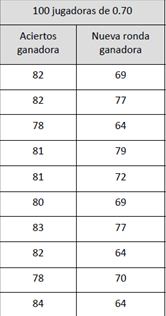

Nuevamente vemos, que el puntaje alcanzado por la mejor jugadora cuando compitió contra las
otras 99, NO ES VUELTO A ALCANZAR en la nueva ronda de 100 tiros libres que hace esa jugadora.

Este efecto es exactamente el mismo que vemos cuando alguien se empecina en lograr en el
Leaderboard Público el mayor puntaje de la clase, le va muy bien en el Público, pero se derrumba
catastróficamente en el Privado. Decimos que “overfiteó / sobreajustó el Leaderboard Publico”.

## 5) Quinto Caso, medida de la diferencia: "El problema de las múltiples comparaciones”

Ahora nos preguntamos, en este caso, en promedio ¿Cuánto más aciertos tiene la ganadora (debido
a la suerte) en la primera ronda con respecto a la segunda?

Corriendo el siguiente código vemos que la diferencia promedio es de aproximadamente 11.0

In [11]:
# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino las jugadoras
jugadoras = [0.7] * 100


# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

suma_diferencias = 0

for i in range(10000):
  vaciertos = vec_ftirar(jugadoras, 100) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  aciertos_torneo = vaciertos[mejor_ronda]
  aciertos_segunda = vec_ftirar(jugadoras[mejor_ronda], 100)
  suma_diferencias += (aciertos_torneo - aciertos_segunda)




print(suma_diferencias/10000)

11.0179


Exactamente este mismo efecto se da en el marketing digital. Si en un A/B testing se prueban cien
alternativas y se elige a la que tiene más efectividad, se observará que en un nuevo experimento
disminuirá el rendimiento de esa alternativa.

También sucede si se prueban muchos medicamentos al mismo tiempo, el que resulte más
efectivo disminuirá su efectividad en la nueva prueba.

Este problema es llamado “El problema de las múltiples comparaciones”

## 6) Sexto Caso, una sola jugadora muy buena: atenuación del overfitting

Sexto caso, ¿cuándo se atenúa/desaparece el overfitting?

Supongamos 99 jugadoras con un índice de enceste de 0.60 y ahora sumamos a la adolescente
Diana Taurasi con su superlativo índice de enceste del 0.85

Los hacemos tirar a todas 100 tiros libres, llevamos a la ganadora a la gran ciudad, y allí le
contamos a la entrenadora de nuestra ganadora Diana Taurasi.

In [12]:
# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino las jugadoras
taurasi = 0.85
peloton = [0.6] * 99
jugadoras = np.append(taurasi, peloton)

# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

for i in range(10):
  vaciertos = vec_ftirar(jugadoras, 100) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  aciertos_torneo = vaciertos[mejor_ronda]
  aciertos_segunda = vec_ftirar(jugadoras[mejor_ronda], 100)
  print(aciertos_torneo, "\t", aciertos_segunda)

90 	 93
86 	 86
89 	 81
81 	 85
86 	 87
85 	 80
82 	 89
84 	 86
88 	 82
85 	 85


(imagen ilustrativa)
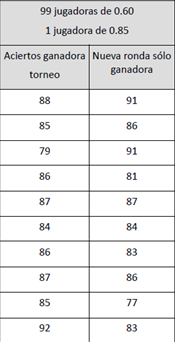

En este caso observamos dos cosas, en primer lugar SIEMPRE la ganadora del torneo fue Diana
Taurasi, y en segundo cuando tuvo que mostrar en la ciudad su performance, fue la misma que en
el primer torneo. Es tan buena Taurasi que le ganó a la que tuvo más suerte del pelotón, el efecto
suerte no está afectando a Taurasi porque está sola, y gana por su superioridad, no por la suerte.

## 7) Séptimo caso, tamaño de la ronda ("la verdadera mejor")

Cazatalentos llega ahora a un pueblo donde hay 100 jugadoras las que son mucho más parejas
entre sí desde el punto de vista del ratio de enceste.

Hay un jugadora, que llamaremos jugadora 1 que tiene un “índice de enceste” de 0.70 , es una
jugadora buena pero dista mucho de ser Diana Taurasi, jamás estará en el "WNBA Hall of Fame".

Las 99 jugadoras restantes que llamaremos “el pelotón” tienen los índices de enceste { 0.501,
0.0502, 0.503, …, 0.599 } Es decir la jugadora 1 tiene 0.70 y la mejor jugadora del pelotón tiene
0.599, o sea hay un poco más de 0.10 de diferencia. La diferencia de 0.10 es significativa

¿Cuántos tiros libres debe la cazatalentos pedirles que haga cada jugadora para que si elige a la
mejor jugadora tiene la certeza de llevarse a “la verdadero mejor” el 99% de los casos?

In [13]:
# calcula cuantos encestes logra un jugador con indice de enceste prob
# que hace qyt tiros libres
def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob) 


# defino las jugadoras
mejor = 0.7
peloton = np.array(range(501, 600)) / 1000
jugadoras = np.append(peloton, mejor) # intencionalmente la mejor esta al final

# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

for tiros_libres in [10, 20, 50, 100, 200, 300, 400, 415, 500, 600, 700, 1000]:
  primera_ganadora = 0
  for i in range(10000):
    vaciertos = vec_ftirar(jugadoras, tiros_libres) # 10 tiros cada jugadora
    mejor_ronda= np.argmax(vaciertos)
    if mejor_ronda == 99:
      primera_ganadora += 1
  print(tiros_libres, "\t", primera_ganadora/10000)

10 	 0.0317
20 	 0.0802
50 	 0.2823
100 	 0.5516
200 	 0.8519
300 	 0.9598
400 	 0.9874
415 	 0.9917
500 	 0.9964
600 	 0.9995
700 	 0.9997
1000 	 1.0


(imagen ilustrativa)
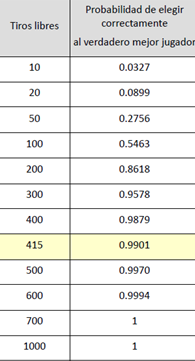

Haciendo tirar 415 tiros libres a cada una de los 100 jugadoras, y quedándose con la ganadora de
ese torneo, en el 99.10% ( 0.9910 ) de los casos se está segura que esa es "la verdadera mejor".

# Conclusiones

El overfitting aparece cuando se comparan muchas jugadoras (modelos predictivos) muy
parecidas entre sí. En el modelado predictivo es la situación más común que se tengan modelos
con similar poder predictivo ya que generalmente solo difieren apenas en valores de los
hiperparámetros o algunas columnas nuevas con feature engineering.

Las jugadoras no son determinísticas, sino probabilísticas, con lo cual al comparar muchas
parecidas la ganadora es quien tuvo más suerte en ese torneo. La jugadora ganadora ganó por
mera suerte, y NO puede sostener esa suerte en un nuevo torneo, por lo que el puntaje del primer
torneo es mentiroso, no se sostiene en el nuevo torneo.

El overfitting se atenúa o puede llegar a desaparecer del todo, si en el torneo hay una jugadora
ampliamente superior al resto. Esa jugadora SI mantiene su performance de un torneo al otro, ya
que su puntaje en el primer torneo fue alto porque es realmente buena, porque no es el máximo
de muchos parecidas a ella.

La forma de combatir el overfitting es hacer torneos de muchos tiros libres.
Para estimar que tan buena es la jugadora ganadora de un torneo, hay que hacerla tirar
nuevamente tiros libres. El secreto está en hacer más de un torneo.

# Desafío cazatalento: Ordenamiento

Se reúne la entrenadora en la gran ciudad con algunas cazatalentos que visitaron regiones
distintas.

Entrenadora: Bienvenidas a todas, veo que cada una de ustedes ha traído la estadística de su
candidata. Sin embargo, yo debo ordenarlas de mejor a peor, y no me alcanza con que dos de
ustedes me digan que que sus candidatas encestaron 80/100, necesito que me expliquen
exactamente el procedimiento que han seguido para elegir a la mejor jugadora.

Cazatalentos 1: Discúlpeme entrenadora, si dos de nosotras le presentamos casos que en distintos
pueblos han encestado exactamente 80 de 100, probabilísticamente esas adolescentes son
equivalentes. Es cierto que luego aquí en la gran ciudad el día de la prueba una podrá encestar 77
de 100, la otra 83, pero eso es la parte natural del random, ya sabemos que la distribución es
binomial. Ambas son equivalentes, no importa qué pasó con el resto de las jugadoras de su
pueblo.

Entrenadora: Estimada “Cazatalentos 1” tú estás equivocada, no consideras El Problema de las
Múltiples Comparaciones; elegir cuales de esas adolescentes vendrán a la gran ciudad a ser
evaluadas es mi decisión. Comienza tú contando detalladamente el proceso que has seguido.

- **Cazatalentos 1**: Llegué a la localidad habían 100 adolescentes en el gimnasio, hice tirar a cada una
100 tiros, sólo una obtuvo 80 aciertos, luego un par 79, otro par 78, y así descendían.

- **Cazatalentos 2**: Llegué a una pequeña ciudad y habían 200 adolescentes en el gimnasio, hice tirar
a cada una 100 tiros, sólo una obtuvo 80 aciertos, seis 79, cinco 78, y así descendían.

- **Cazatalentos 3**: Llegué a un minúsculo pueblo con un aro reglamentario en la pared de una
escuela, había solamente 2 adolescentes, hice tirar a cada una 100 tiros, una obtuvo 80 y la otra 75.

- **Cazatalentos 4**: Ehh, yo soy nueva y no tenía clara la regla de hacer tirar 100 tiros. Fui a un pueblo,
había 100 adolescentes, le hice tirar 10 tiros a cada una. La mejor de ellas acierta 9 y la elegí como ganadora, luego ya hay varias con 8 aciertos, 7, etc.

- **Cazatalentos 5**: Había 100 adolescentes, las hice tirar una primer ronda de 100 tiros, me quedé con las 5 mejores de esa primer ronda, y luego hice dos rondas más de 100 tiros, los resultados fueron los siguientes

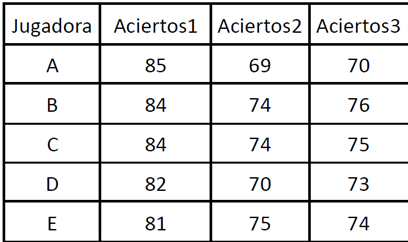

Elijo jugadora A

- **Cazatalentos 6**: Yo poseo 25 años de experiencia como cazatalentos y tengo muy buena intuición para detectar el talento Llegué a un pueblo donde habían 100 adolescentes, me senté en las gradas del gimnasio y las observé detenidamente mientras recalentaban sin tirar al aro. A los 10 minutos, me paro, y señaló a una de ellas y le digo : 'tú, la número 13, a tirar 100 tiros; el resto, se puede ir a la casa”. Y ahí al tirar esos 100 tiros logró 80 aciertos y esa es mi candidata.

- **Cazatalentos 7**: Llegué al pueblo,habían 100 adolescentes, y les hice tirar una primera ronda de 100 tiros libres a cada una. Luego, a las 5 mejores, las hice tirar una segunda ronda de 100 tiros, y la mejor jugadora logró 80 aciertos en esta segunda ronda, y el resto 79, 78, 77 y 72.

- **Cazatalentos 8**: Conozco desde hace una década a la profesora de educación física que está a cargo del gimnasio del pueblo al que fui hoy. Llegué dos horas antes, y luego de ponernos al día, me mostró una planilla Excel con los resultados de tiros libres de 30 de las 100 adolescentes que iban a participar. Seguí el protocolo, hice tirar a cada una de los 100 adolescentes 100 tiros libres, hubo una que hizo 85 encestes, un par 84, tres 83, y luego continuaba la escalerita. Quien logró los 85 encestes, a quien elegí, en la planilla de profesora tenía la semana previa 790 encestes de 1000 tiros libres.

- **Cazatalentos 9**: La cazatalentos 9 le dice a la entrenadora : “fui a una localidad de 500 habitantes, había una sola adolescente interesada, la hice tirar 100 tiros libres, y encestó 80, tengo grabado sin cortes los 100 tiros”. En realidad, esa adolescente es la sobrina de la cazatalentos, la hizo tirar 10 rondas de 100 tiros cada una, grabó todas, pero solo trae la grabación de la mejor ronda a la entrenadora. Los resultados obtenidos por su sobrina son...
- (esta deshonestidad de la Cazatalentos 9 no debería parecerle extraña, es exactamente lo mismo que elegir cómo submit final el que le fue mejor en el Public Leaderboard, algo muy común entre los alumnos ...)
- Por una persona espía en el pueblo, la entrenadora está al tanto de lo ocurrido y conoce la tabla anterior, usará dicha información para tomar la decisión, aunque no le dirá nada, por esta vez, a la cazatalentos.
- Podemos suponer que la super talentosa Diana Taurasi con su “índice de enceste” del 0.85 es superior a todas las jugadoras evaluadas en los pueblos por las cazatalentos.

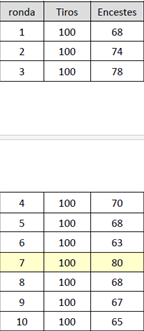

## Desafío

Podemos suponer que la super talentosa Diana Taurasi con su “índice de enceste” del 0.85 es superior a todas las jugadoras evaluadas en los pueblos por las cazatalentos. ¿Si usted fuera la entrenadora, como ordena el valor esperado de encestes en una ronda de 100 tiros libres a cada una de las candidatas propuestas por las ocho cazatalentos ?

donde Ci < Cj sii prob( #Encestes Ci < #Encestes Cj | 100 tiros cada uno ) > 0.5

es decir que, haciendo 100 tiros libres, más de la mitad de las veces, Ci va a lograr menos
encestes que Cj

La entrenadora de la gran ciudad NO quiere traer a la elegida de cada cazatalentos y hacerlas tirar 100 tiros delante de ella para constatar cual logra más encestes en esa ronda. Ella quiere, con la información que le brindó cada cazatalento sobre el procedimiento y los resultados, elegir la mejor encestadora.

# Reglas

La fecha de finalización del desafío es el domingo 10 de septiembre a las 23:59
Usted podrá trabajar en forma individual o formando grupo de dos personas.
Entrega
- en la solapa CazaTalentos de la Google Sheet Colaborativa de la Asignatura
- Ordenamiento
- Explicación

◦ Si se apoyó en algún/os script/s
- carpeta en GitHub

Recompensa:
- Todos los integrantes de todos los grupos que logren un ordenamiento perfecto sumarán a su nota final el valor de 1.0 (siempre la nota máxima posible de toda la asignatura será de 10.0)
- Particularidades: Es posible que usted llegue a la conclusión que lo mejor que se puede obtener es un orden parcial de las candidatas y no un orden total; deberá justificar.
- Será muy valioso el intercambio de ideas en Zulip stream #CazaTalentos , este problema suele ser muy polémico, en particular la Cazatalentos 5 genera gran incertidumbre. La participación en este desafío es opcional.

**Bibliografía**
- https://www.youtube.com/watch?v=FpCrY7x5nEE
- https://www.youtube.com/watch?v=42QuXLucH3Q
- https://www.youtube.com/watch?v=6ZxIzVjV1DE
- https://en.wikipedia.org/wiki/Replication_crisis
- https://www.theatlantic.com/magazine/archive/2010/11/lies-damned-lies-and-medical-science/3
08269/
- https://www.nature.com/news/over-half-of-psychology-studies-fail-reproducibility-test-1.18248